In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("Seguimiento de gripe de fhca.xlsx", header=1, index_col=1)

In [3]:
temp = df['temperatura']

In [4]:
def matriz_de_recurrencia1(serie):
    """'serie' es una pandas.core.series.Series, indexada con 
    pandas.tseries.index.DatetimeIndex y valores numéricos."""
    tiempo=np.array(serie.index)
    n = tiempo.size
    xs = np.repeat(tiempo, repeats=n)
    ys = tiempo[np.newaxis].repeat(n, axis=0).flatten()
    mat = np.abs(serie[xs].values - serie[ys].values).reshape(n,n)
    plt.imshow(np.sqrt(mat), cmap=plt.cm.hot)
    
def matriz_de_recurrencia(serie):
    """'serie' es una pandas.core.series.Series, indexada con 
    pandas.tseries.index.DatetimeIndex y valores numéricos."""
    tiempo=np.array(serie.index)
    n = tiempo.size
    xs = np.repeat(tiempo, repeats=n)
    ys = tiempo[np.newaxis].repeat(n, axis=0).flatten()
    mat = ((serie[xs].values - serie[ys].values)**2).reshape(n,n)
    plt.imshow(np.sqrt(mat), cmap=plt.cm.hot)
    
def matriz_de_recurrencia_ciclo(serie):
    """'serie' es una pandas.core.series.Series, indexada con 
    pandas.tseries.index.DatetimeIndex y valores numéricos.
    quiero que 9 este cerca de 0, así 
    """
    tiempo=np.array(serie.index)
    n = tiempo.size
    xs = np.repeat(tiempo, repeats=n)
    ys = tiempo[np.newaxis].repeat(n, axis=0).flatten()
    mat1 = np.abs(serie[xs].values - serie[ys].values)
    mat = np.minimum(mat1, 20 - mat1).reshape(n,n)
    plt.imshow(np.sqrt(mat), cmap=plt.cm.hot)

In [5]:
def charts(ts):
    plt.plot(ts[-100:], 'g*-') # grafica sólo últimos 100 valores
    plt.show()
    matriz_de_recurrencia(ts)
    plt.show()

In [6]:
len(temp)

47

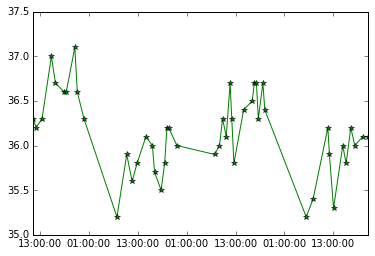

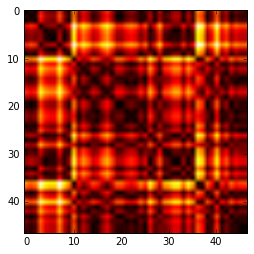

In [7]:
charts(temp)

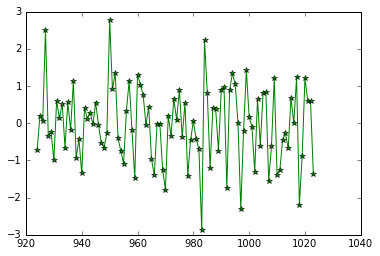

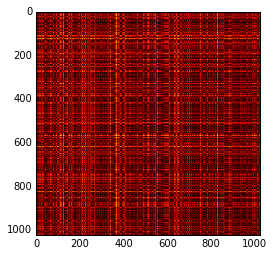

In [8]:
charts(pd.Series(np.random.randn(1024)))

In [9]:
def logistica(R,x):
    return R*x-R*x*x

def orbita(f, R):
    x0 = 0.5
    n = 1000
    for _ in range(n): #transciente
        x0 = f(R, x0)
    l = [x0]
    for _ in range(n - 1):
        l.append(f(R, l[-1]))
    return pd.Series(l)

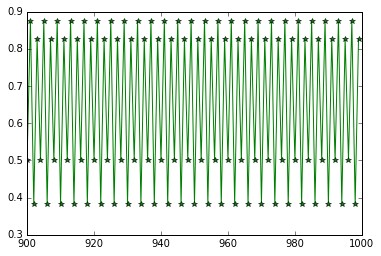

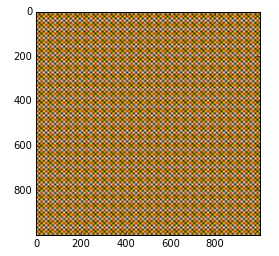

In [10]:
charts(orbita(logistica, 3.5))

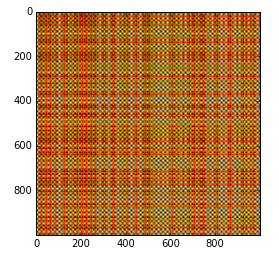

In [11]:
matriz_de_recurrencia(orbita(logistica, 3.6))

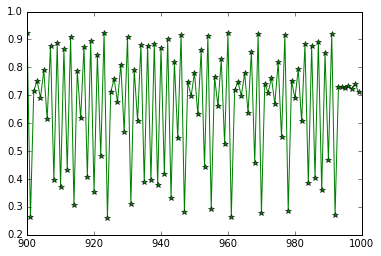

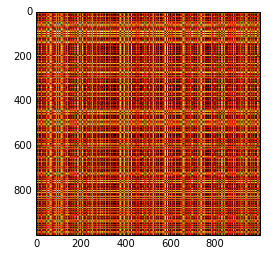

In [12]:
charts(orbita(logistica, 3.7))

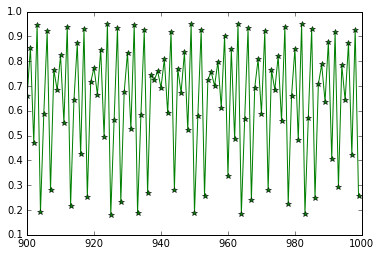

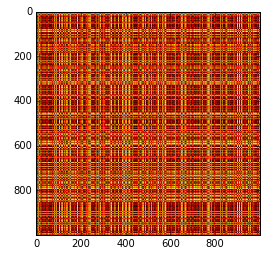

In [13]:
charts(orbita(logistica, 3.8))

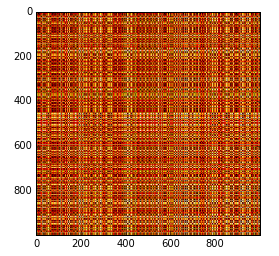

In [14]:
matriz_de_recurrencia(orbita(logistica, 3.9))

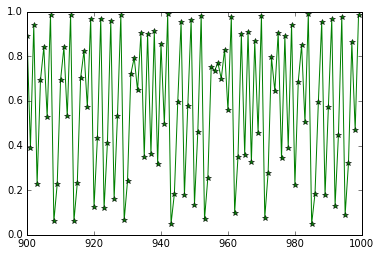

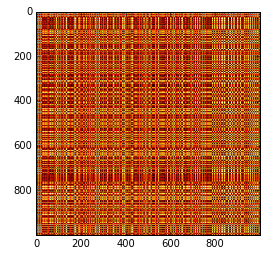

In [15]:
charts(orbita(logistica, 3.95))

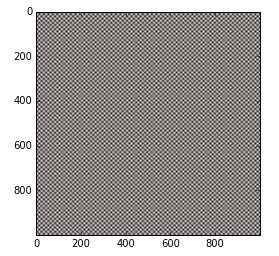

In [16]:
def seno(R, x):
    return np.sin(R*np.pi*x)

matriz_de_recurrencia(orbita(seno, .8))

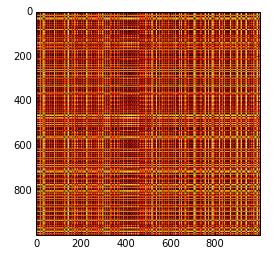

In [17]:
matriz_de_recurrencia(orbita(seno, .9))

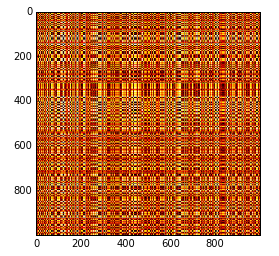

In [18]:
matriz_de_recurrencia(orbita(seno, 1))

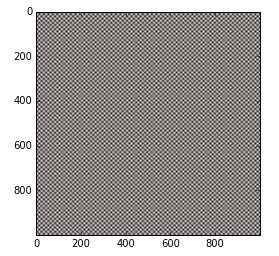

In [19]:
matriz_de_recurrencia(orbita(seno, 1.5))

In [20]:
def digitos(n, k):
    "devuelve los primeros n dígitos de k."
    l = [0]
    for _ in range(n):
        l.append(k)
        l[-2], k = int(10*l[-1]), 10*l[-1] - int(10*l[-1])
    return pd.Series(l[:-1])

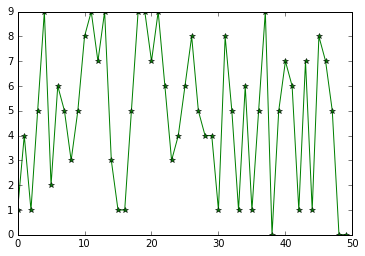

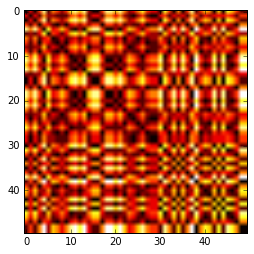

In [21]:
charts(digitos(50, np.pi-3))

In [22]:
try:
    # import version included with old SymPy
    from sympy.mpmath import mp
except ImportError:
    # import newer version
    from mpmath import mp
mp.dps = 1000  # set number of digits
#print(mp.pi) # print pi to a thousand places

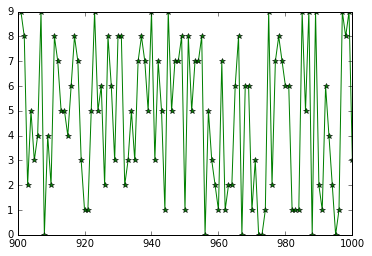

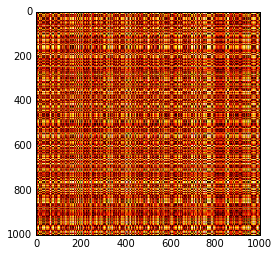

In [23]:
charts(digitos(1001, mp.pi-3))

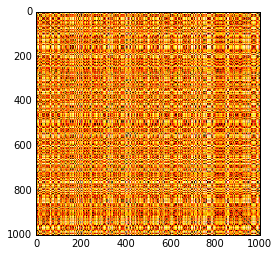

In [24]:
matriz_de_recurrencia_ciclo(digitos(1001, mp.pi-3))

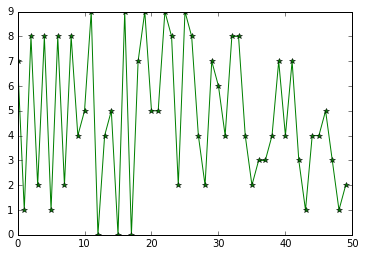

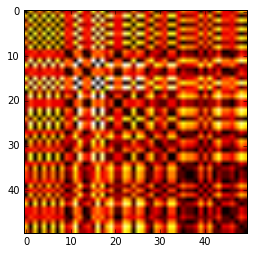

In [25]:
charts(digitos(50, np.e-2))

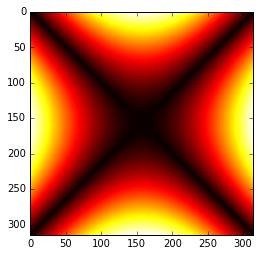

In [26]:
matriz_de_recurrencia(pd.Series(np.sin(np.arange(0,np.pi,.01))))

In [27]:
def fibonacci(n):
    l = [1, 1]
    for _ in range(n-2):
        l.append(l[-2] + l[-1])
    return pd.Series(l)

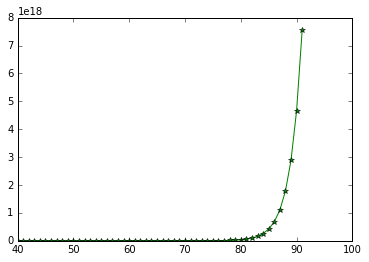

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in sqrt


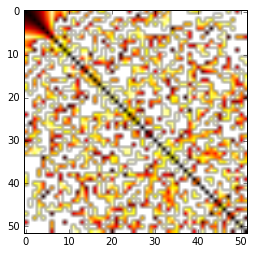

In [28]:
charts(fibonacci(92)[40:]) # ultimo valor 92

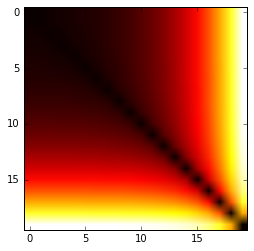

In [29]:
matriz_de_recurrencia1(fibonacci(20)) # ultimo valor 92

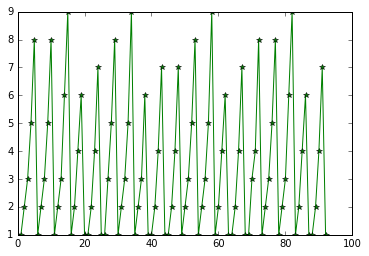

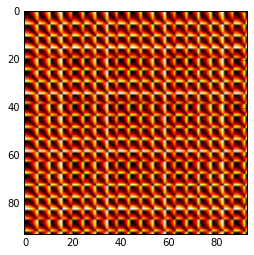

In [30]:
def primer_digito_fibonacci(n):
    a = 1
    b = 1
    l = [1, 1]
    for _ in range(n-2):
        a, b = b, a+b
        l.append(int(b / 10 ** int(np.log(b)/np.log(10))))
    return pd.Series(l)

charts(primer_digito_fibonacci(93)) #ultimo valor 93, probar con 11, 20

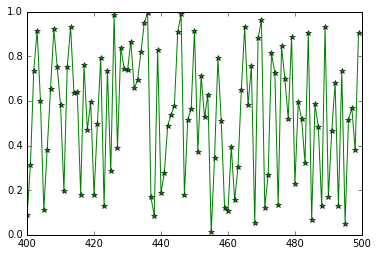

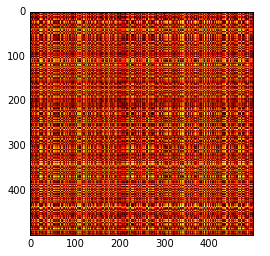

In [31]:
charts(pd.Series(np.random.rand(500)))